# Leveraged ETFs

Using Leveraged ETFs in combinations with fixed income products to yield higher returns than SPY.

## Initialization

In [3]:
# initialize the module and import all libraries
from init import *

## Config

In [83]:
START_DATE = "2020-01-01"
END_DATE = "2024-01-01"
SYMBOLS = ["SPY", "SSO"] # SSO is a leveraged etf for SPX
INTERVAL = "1wk"

FIXED_INCOME_RETURN = 0.03

## Data Collection and Preparation

In [37]:
prices_df = yf.download(
    tickers=SYMBOLS, start=START_DATE, end=END_DATE, interval=INTERVAL
)["Adj Close"]
prices_df = prices_df / prices_df.iloc[0]
prices_df["SPY Returns"] = (prices_df["SPY"] / prices_df["SPY"].shift(1)).fillna(1) - 1
prices_df["SSO Returns"] = (prices_df["SSO"] / prices_df["SSO"].shift(1)).fillna(1) - 1
prices_df["Leverage"] = (prices_df["SSO Returns"] / prices_df["SPY Returns"]).fillna(2)
prices_df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,SPY,SSO,SPY Returns,SSO Returns,Leverage
Date,,,,,
2020-01-01,1.000000,1.000000,0.000000,0.000000,2.000000
2020-01-08,1.014625,1.028907,0.014625,0.028907,1.976541
2020-01-15,1.026555,1.052534,0.011758,0.022963,1.953027
2020-01-22,1.012890,1.023693,-0.013312,-0.027402,2.058477
2020-01-29,1.019614,1.036299,0.006639,0.012314,1.854918


## Research

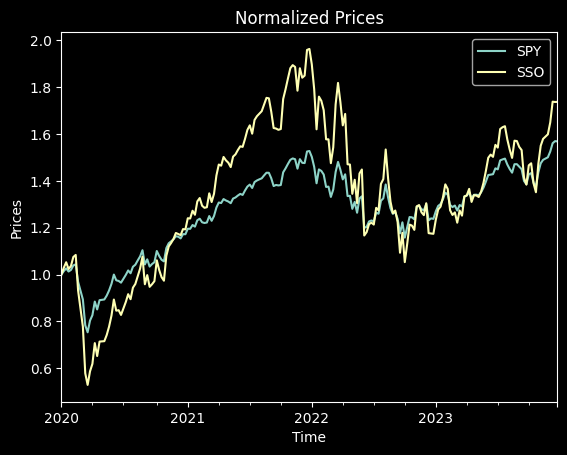

In [39]:
ax = prices_df[SYMBOLS].plot()
plt.title("Normalized Prices")
plt.xlabel("Time")
plt.ylabel("Prices")
plt.legend()
plt.show()

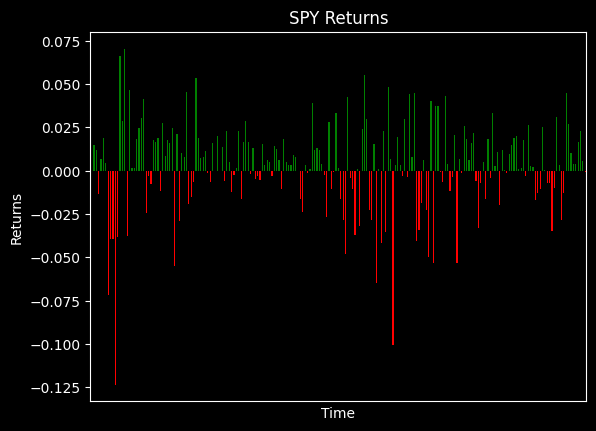

In [46]:
plot_returns(prices_df["SPY Returns"], title="SPY Returns")

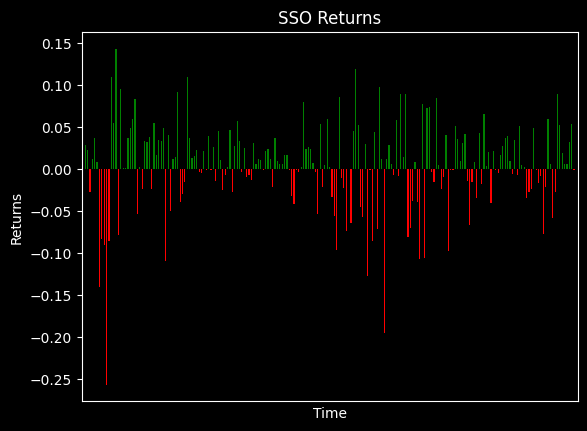

In [47]:
plot_returns(prices_df["SSO Returns"], title="SSO Returns")

<Axes: xlabel='Date'>

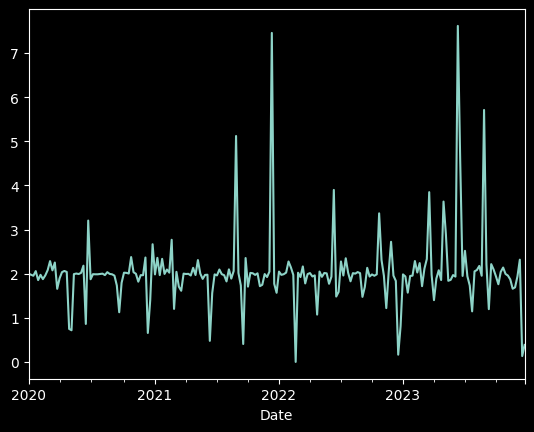

In [90]:
prices_df["Leverage"].abs().plot()

In [43]:
prices_df[SYMBOLS].iloc[-1]

Ticker
SPY    1.568426
SSO    1.737160
Name: 2023-12-27 00:00:00, dtype: float64

In [45]:
prices_df["Leverage"].abs().mean()

2.026319899177706

## Strategy

In [84]:
sso_proportion = 0.5

In [85]:
prices_df["Strategy"] = prices_df["SSO"] * sso_proportion + (np.power((1 + FIXED_INCOME_RETURN), 1/52) ** np.arange(len(prices_df["SSO"]))) * (1 - sso_proportion)
prices_df["Strategy Returns"] = (prices_df["Strategy"] / prices_df["Strategy"].shift(1)).fillna(1) - 1


## Performance

<Axes: xlabel='Date'>

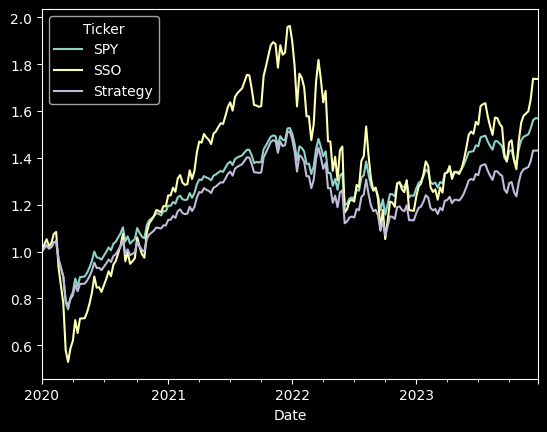

In [86]:
prices_df[SYMBOLS + ["Strategy"]].plot()

In [87]:
def calculate_sharpe_ratio_stats(returns, risk_free_rate=0):
    excess_return = returns - risk_free_rate / 52  # Adjust for weekly risk-free rate
    annualized_return = excess_return.mean() * 52  # Assuming 52 weeks in a year
    annualized_volatility = excess_return.std() * np.sqrt(52)

    sharpe_ratio = annualized_return / annualized_volatility
    return sharpe_ratio, annualized_return, annualized_volatility

In [88]:
print("SSO Sharp Ratio, Annual Returns, Annual Vols:", *calculate_sharpe_ratio_stats(prices_df["SSO Returns"]))
print("SPY Sharp Ratio, Annual Returns, Annual Vols:", *calculate_sharpe_ratio_stats(prices_df["SPY Returns"]))
print("Strategy Sharp Ratio, Annual Returns, Annual Vols:", *calculate_sharpe_ratio_stats(prices_df["Strategy Returns"]))


SSO Sharp Ratio, Annual Returns, Annual Vols: 0.5607157555166351 0.2103356199495867 0.37511986756246324
SPY Sharp Ratio, Annual Returns, Annual Vols: 0.6919319307234946 0.12993253919761522 0.1877822563583036
Strategy Sharp Ratio, Annual Returns, Annual Vols: 0.5536016187801169 0.10886286550119806 0.1966447745241094


## Testing